In [1]:
import pydot
from IPython.display import SVG
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# graphs = pydot.graph_from_dot_file("dot_files/1.dot")
# graph = graphs[0]

In [3]:
# # SVG(graph.create_svg())
# graph.write_png('output.png')

In [24]:
points_dict = {}
with open("data/points.txt") as f:
    line_str = f.readline() 
    while line_str:
        tmp = line_str.split("#")
        points = tmp[1].replace("\n","")
        points = points.split(";")
        points = [[float(x) for x in point.split(",")] for point in points]
        x_arr = [el[0] for el in points]
        y_arr = [el[1] for el in points]
        x_vel_arr = [el[2] for el in points]
        y_vel_arr = [el[3] for el in points]
        points_dict[int(tmp[0])] = {
            "x":x_arr,
            "y":y_arr,
            "x_vel":x_vel_arr,
            "y_vel":y_vel_arr
        }
        line_str = f.readline()
    

In [25]:
# list(points_dict.keys())

In [31]:
df_1 = pd.DataFrame.from_dict(points_dict[1])
df_1['speed'] = df_1['x_vel']*df_1['x_vel'] + df_1['y_vel']*df_1['y_vel']
df_1['speed'] = np.sqrt(df_1['speed'])
df_1.head()

,x,y,x_vel,y_vel,speed
0,84.176967,39.597662,1.597716,1.590499,2.254414
1,19.910204,33.577282,1.564875,0.544587,1.656928
2,47.812777,62.988948,0.731859,1.010312,1.247537
3,91.756145,63.596987,1.298176,0.233070,1.318932
4,1.659424,24.448986,0.312878,1.597829,1.628174


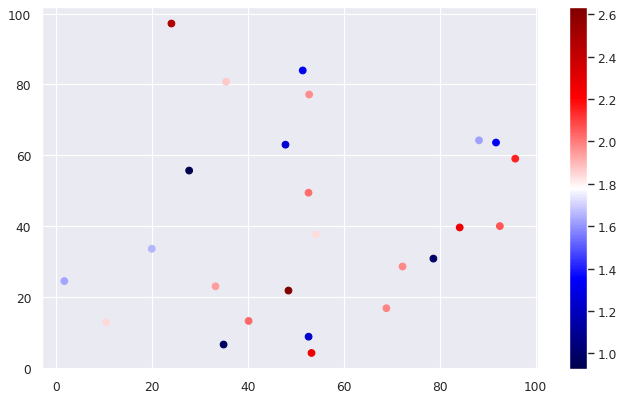

In [27]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x=df_1['x'], y=df_1['y'], c=df_1['speed'], cmap='seismic')
cbar = plt.colorbar()

In [30]:
df_2 = pd.DataFrame.from_dict(points_dict[100])
df_2['speed'] = df_2['x_vel']*df_2['x_vel'] + df_2['y_vel']*df_2['y_vel']
df_2['speed'] = np.sqrt(df_2['speed'])
df_2.head()

,x,y,x_vel,y_vel,speed
0,-2042.699001,3097.815822,-513.274454,714.233622,879.534156
1,528.974951,26.944379,122.008198,9.824010,122.403070
2,93.767148,-119.027367,14.686825,-50.322218,52.421641
3,320.617136,1044.433587,53.009517,206.782166,213.468670
4,866.168627,225.976188,213.097161,70.626565,224.496128


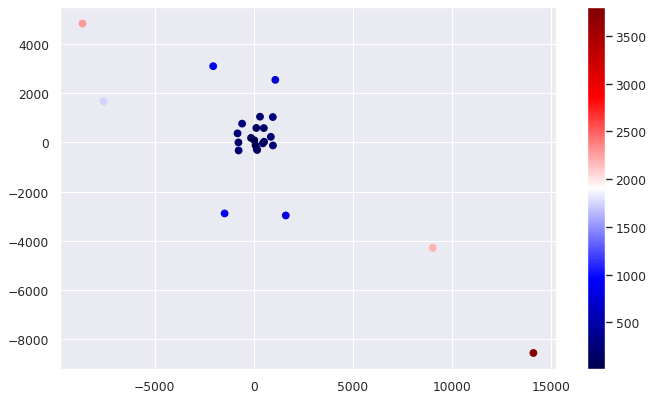

In [29]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x=df_2['x'], y=df_2['y'], c=df_2['speed'], cmap='seismic')
cbar = plt.colorbar()